$\begin{array}{lcl}
\mbox{(FFLP)}\, &\mbox{Min} & \tilde{z}=(-1,0,2)\tilde{x}_1+(1,2,3)\tilde{x}_2 \in\mathcal{F}_C \\
&\mbox{s.t.} & (2,5,8)\tilde{x}_1+(3,4,10)\tilde{x}_2 <\simeq (1,3,6)\\
&& (4,5,7)\tilde{x}_1+(0,5,15)\tilde{x}_2<\simeq (2,3,6)\\
&& \tilde{x}_1, \tilde{x}_2 >\simeq 0
\end{array}
$

There are two fuzzy variables, and two constraints with triangular fuzzy numbers,  this is a  $1-$polygonal case.


In [1]:
M = 2 # no. constraints
N = 2 # no. fuzzy variables
K = 3 # fuzzy "size" (triangular)

# Objective function (costs vector)
C1 = array(c(-1,0,2,1,2,3),c(K,N))
print("Objective function")
C1

# Constraints (matrix of coeff.):
A1= array(c(2,4,5,5,8,7,
            3,0,4,5,10,15),c(M,K,N))
print("Matrix of coeff., 1st component")
# First component of the Triangular Fuzzy Number
A1[,1,]
# Second component of the Triangular Fuzzy Number
print("Matrix of coeff., 2nd component")
A1[,2,]
# Third component of the Triangular Fuzzy Number
print("Matrix of coeff., 3rd component")
A1[,3,]





# another simple option is to define them as a matrix,
# but, for algorithm purposes, this structure suits better

# RHS (right hand side), or Vector of coefficients:
B1 = matrix(c(1,3,6,
              2,3,6),
            nrow=M,ncol=K,
            byrow = TRUE)

print("Vector of coefficients")
B1

[1] "Objective function"


-1,1
0,2
2,3


[1] "Matrix of coeff., 1st component"


2,3
4,0


[1] "Matrix of coeff., 2nd component"


5,4
5,5


[1] "Matrix of coeff., 3rd component"


8,10
7,15


[1] "Vector of coefficients"


1,3,6
2,3,6


Following the multiobjective linear problem (MOLP) associated is formulated, where the multiobjective function $f=(f_1,f_2,f_3):\mathbb{R}^6\rightarrow \mathbb{R}^3$ is a  vector-valued function, evaluated on 
$x=(x^-_1,\hat{x}^{}_1,x^+_1, x^-_2,\hat{x}^{}_2,x^+_2)\in \mathbb{R}^6$,

$\begin{array}{rcl}
\mbox{(MOLP)}\ \ \mbox{Min } \ \ f(x) & = & (-x^+_1+x^-_2, 2\hat{x}^{}_2, 2x^+_1+3x^+_2)\in \mathbb{R}^3 \\
&s.t.& \\
&& \begin{array}{rcl}
2x^-_1+3x^-_2 &\leq& 1,\\%[1ex]
 5\hat{x}^{}_1+4\hat{x}^{}_2 &\leq& 3,\\%[1ex]
 8x^+_1+10x^+_2 &\leq& 6,\\%[1ex]
4x^-_1 &\leq& 2,\\%[1ex]
5\hat{x}^{}_1 +5\hat{x}^{}_2&\leq& 3,\\%[1ex]
7x^+_1+15x^+_2 &\leq& 6,\\%[1ex]
x^-_n-\hat{x}^{}_n &\leq& 0,\quad n=1,2\\%[1ex]
\hat{x}^{}_n-x^+_n &\leq& 0,\quad n=1,2 \\%[1ex]
x^-_n,\hat{x}^{}_n ,x^+_n &\geq& 0,  \quad n=1,2
\end{array}
\end{array}
$

There are $M_2=3M + 3N = 10$ constraints, and $N_2=3N=6$ variables. 

In [2]:
# MOLP associated
M2 = M*K+N*(K-1) # total no. of constraints
N2 = N*K # total no. of vars

Equivalently, the above problem in matrix notation results as 

\begin{eqnarray*}
\mbox{(MOLP)}\ \ &\mbox{Min } & Cx \in \mathbb{R}^{3} \\
&s.t.& Ax \leq b,  \\
&& x\geq 0
\end{eqnarray*}

where, 

$
C = \left( \begin{array}{cccccc}
%1    &0    &0  &  1  &  0   & 0  \\
0    &0    &-1  &  1  &  0   & 0  \\
 0   &0  &  0 &   0  &  2 &   0 \\
 0   & 0  &  2  &  0 &   0  &  3 
\end{array} \right),
\qquad 
A = \left( \begin{array}{cccccc}
2  &  0  &  0  &  3  &  0  &  0  \\%[-0.5ex]
0  &  5  &  0 &   0 &   4   & 0   \\%[-0.5ex]
0  &  0  &  8  &  0  &  0  & 10   \\%[-0.5ex]
4  &  0  &  0 &  0  &  0  &  0   \\%[-0.5ex]
0  &  5  & 0  &  0   & 5   & 0   \\%[-0.5ex]
0  &  0  &  7 &   0 &   0  & 15  \\%[-0.5ex]
1  & -1  &  0 &   0  &  0  &  0  \\%[-0.5ex]
0  &  1  & -1  &  0  &  0 &   0   \\%[-0.5ex]
0  &  0  &  0  &  1  & -1  &  0   \\%[-0.5ex]
0 &   0  &  0  &  0  &  1  & -1  
\end{array} \right),
\quad
b =
\begin{pmatrix}
1 \\ 3 \\ 6 \\ 2 \\ 3 \\ 6 \\0\\0\\0\\0 
\end{pmatrix},
\quad 
\text{ and }
\quad
x = \begin{pmatrix}
x^-_1 \\ \hat{x}^{}_1 \\ x^+_1 \\ x^-_2 \\ \hat{x}^{}_2 \\ x^+_2
\end{pmatrix}
\in \mathbb{R}^{6}
$


In [3]:
## MULTIOBJECTIVE LP associated:

# Matrix of coefficients


# simplest way: direct manually definition of the matrix
#A2 = matrix( c(2 ,   0  ,  0  ,  3  ,  0  ,  0  
#                0    5  ,  0 ,   0 ,   4   , 0   
#                0    0  ,  8  ,  0  ,  0  , 10   
#                4    0  ,  0 ,  0  ,  0  ,  0  
#                0    5  , 0  ,  0   , 5   , 0   
#                0  ,  0  ,  7 ,   0 ,   0  , 15  
#                1  , -1  ,  0 ,   0  ,  0  ,  0  
#                0  ,  1  , -1  ,  0  ,  0 ,   0  
#                0  ,  0  ,  0  ,  1  , -1  ,  0   
#                0 ,   0  ,  0  ,  0  ,  1  , -1),
#            nrow = M2,ncol=N2,byrow=TRUE)

# Or automatic definition, which requires some programming
A2 = matrix(0,nrow = M2,ncol=N2)
# See Eq.(19) + Remark 3
for(m in 1:M){
  # M*K equivalent constraints 
  for(n in 1:N){
    if(K%%2==0){ # gral. k-polygonal Fuzzy Numbers
      for(k in 1:(K/2)){ # see Remark 3
        ifelse(A1[m,k,n]>=0, A2[K*(m-1)+k,K*(n-1)+k] <- A1[m,k,n], A2[K*m+1-k,K*n+1-k] <- A1[m,k,n])
      }
      for(k in (K/2+1):K){ 
        ifelse(A1[m,k,n]<=0, A2[K*m+1-k,K*n+1-k] <- A1[m,k,n] , A2[K*(m-1)+k,K*(n-1)+k] <- A1[m,k,n])
      }
    }
    else{ # k-polygonal Fuzzy Numbers when a^{-}_k = a^{+}_k (i.e. triangular, etc)
      for(k in 1:((K-1)/2)){ # see Remark 3
        ifelse(A1[m,k,n]>=0, A2[K*(m-1)+k,K*(n-1)+k] <- A1[m,k,n], A2[K*m+1-k,K*n+1-k] <- A1[m,k,n])
      }
      A2[K*(m-1)+(K+1)/2,K*(n-1)+(K+1)/2] = A1[m,(K+1)/2,n]
      for(k in ((K+3)/2):K){ 
        ifelse(A1[m,k,n]<=0, A2[K*m+1-k,K*n+1-k] <- A1[m,k,n] , A2[K*(m-1)+k,K*(n-1)+k] <- A1[m,k,n])
      }
    }
    # N*(K-1) constraints to ensure fuzzy numbers (ordering between components)
    for(k in 1:(K-1)){
      A2[M*K + (K-1)*(n-1)+k,K*(n-1)+k] = 1 # k=i
      A2[M*K + (K-1)*(n-1)+k,K*(n-1)+k+1] = -1 # k=i+1
    } 
  }
}


# check it 
A2


2,0,0,3,0,0
0,5,0,0,4,0
0,0,8,0,0,10
4,0,0,0,0,0
0,5,0,0,5,0
0,0,7,0,0,15
1,-1,0,0,0,0
0,1,-1,0,0,0
0,0,0,1,-1,0
0,0,0,0,1,-1


In [4]:
# Vector of coefficients
B2 = rbind(matrix(t(B1)),matrix(0,N*(K-1)))

# check it 
B2


1
3
6
2
3
6
0
0
0
0


In [5]:
# Coefficient function, or costs vector associated
C2 = matrix(0,nrow=K,ncol = N*K)
# See Eq.(18) + Remark 3
for(n in 1:N){
  if(K%%2==0){ # gral. k-polygonal Fuzzy Numbers
    for(k in 1:(K/2)){ 
      ifelse(C1[k,n]>=0, C2[k,K*(n-1)+k] <- C1[k,n], C2[K+1-k,K*n+1-k] <- C1[k,n])
    }
    for(k in (K/2+1):K){ 
      ifelse(C1[k,n]<=0, C2[K+1-k,K*n+1-k] <- C1[k,n], C2[k,K*(n-1)+k] <- C1[k,n])
    }
  }
  else{ # k-polygonal Fuzzy Numbers when a^{-}_k = a^{+}_k (i.e. triangular, etc)
    for(k in 1:((K-1)/2)){ 
      ifelse(C1[k,n]>=0, C2[k,K*(n-1)+k] <- C1[k,n], C2[k,K*n+1-k] <- C1[k,n])
    }
    C2[(K+1)/2,K*(n-1)+(K+1)/2] = C1[(K+1)/2,n]
    for(k in ((K+3)/2):K){ 
      ifelse(C1[k,n]<=0, C2[k,K*n+1-k] <- C1[k,n], C2[k,K*(n-1)+k] <- C1[k,n])
    }
  }
}

# check it 
C2

0,0,-1,1,0,0
0,0,0,0,2,0
0,0,2,0,0,3


In [6]:
# # Weak Pareto Solution for (MOLP)

# install.packages("lpSolve")
library("lpSolve")

# Some weight (arbitrary)
W = c(1,0,0) #rep(1,times=K)
W
W%*%C2 
f.obj = W%*%C2 #c(t(C2))
f.con = A2
f.rhs = B2
f.dir <- rep("<=",times=M2)
# Now run.
WP.Sol = lp ("min", f.obj, f.con, f.dir, f.rhs)
#WP.Sol = array(lp ("min", f.obj, f.con, f.dir, f.rhs)$solution,c(Fu,N))

print("Weak Pareto Solution (WPS)")
WP.Sol$solution

print("WPS objective value")
WP.Sol$objval

#check it 
f.obj%*%WP.Sol$solution

[1] 1 0 0

0,0,-1,1,0,0


[1] "Weak Pareto Solution (WPS)"


[1] 0.00 0.00 0.75 0.00 0.00 0.00

[1] "WPS objective value"


[1] -0.75

-0.75


In [7]:
# Corresponding non dominated Fuzzy Solution for (FFLP)
x1.fsol = WP.Sol$solution[1:3]
x2.fsol = WP.Sol$solution[4:6]

x1.fsol
x2.fsol

[1] 0.00 0.00 0.75

[1] 0 0 0

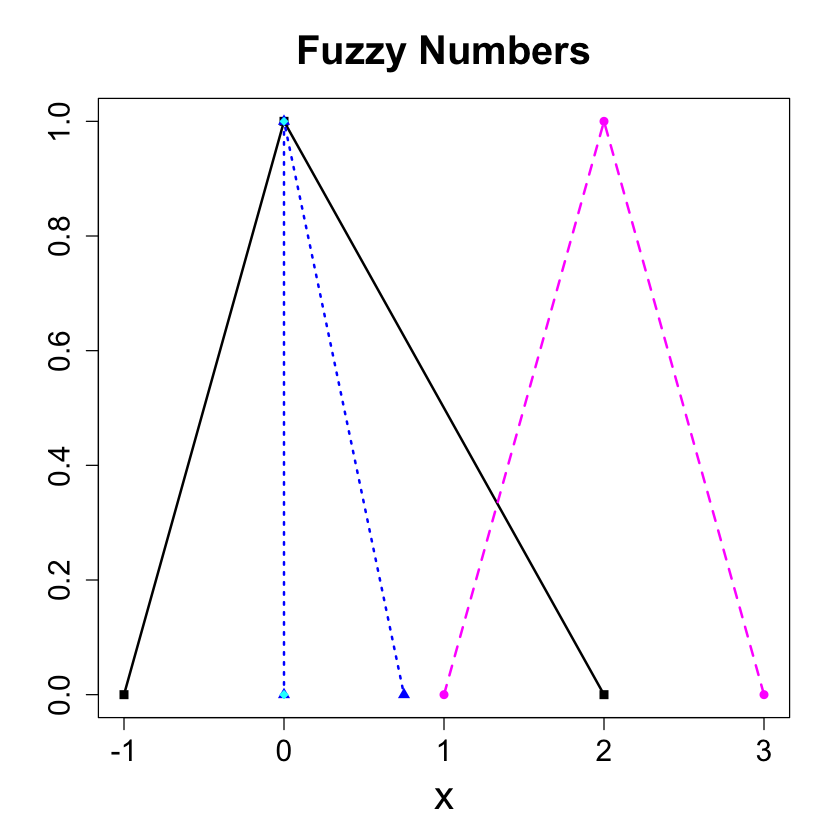

In [8]:
#Example of plotting Fuzzy Numbers

# Objective function (costs vector)
plot(C1[1:3],c(0,1,0),type = "l",lwd=2,col="black" ,
       xlim = c(-1,3),
       main="Fuzzy Numbers", ylab="",
       xlab = "x",
       cex.lab=2,cex.axis=1.5,cex.main=2)
# adding new points/lines (fuzzy number representation) to the previous plot
points(C1[1:3],c(0,1,0),lwd=2,#linewidth
       col= "black",# define color
       pch=15) # point character 

lines(C1[4:6],c(0,1,0),lty=2,#line type
      lwd=2,col= "magenta") 
points(C1[4:6],c(0,1,0),lwd=2,col= "magenta",pch=16) 

# Fuzzy solutions: 
lines(x1.fsol,c(0,1,0),lty=3,lwd=2,col= "blue") 
points(x1.fsol,c(0,1,0),lwd=2,col= "blue",pch=17) 

#lines(x2.fsol,c(0,1,0),lty=4,lwd=2,col= "cyan") 
points(x2.fsol,c(0,1,0),lwd=2,col= "cyan",pch=18) 




